# Doppelpendel


In der Vorlesung habt ihr das Doppelpendel als Beispiel für ein System mit holonom-skleronomen Zwangsbedingungen kennengelernt.
Dieses Pendel zeigt chaotisches Verhalten und seine Bewegungsgleichungen sind nur unter Einschränkung (Kleinwinkelnäherung) analytisch lösbar.

In diesem Notebook wollen wir die analytische Lösung mit der numerischen vergleichen, um uns die Limitierung der Kleinwinkelnäherung zu verdeutlichen und das Verhalten des Pendels jenseits dieser Einschränkung zu erforschen.


## Bewegungsgleichungen

(siehe https://de.wikipedia.org/wiki/Doppelpendel)


Wenn $l_1$ und $l_2$ die Längen der (masselosen) Verbindungsstangen,$m_1$ und $m_2$ die Pendelmassen, $\theta_1, \theta_2$ die Auslenkung vom Lot und $g$ die Erdbeschleunigung bezeichnet, dann findet man für die Positionen von $m_1 $ und $m_2 $:

<math>\begin{align}
x_1 &= l_1 \sin(\theta_1)\\
y_1 &= -l_1 \cos(\theta_1)
\end{align}</math>

<math>\begin{align}
x_2 &= l_1 \sin(\theta_1) + l_2 \sin(\theta_2)\\
y_2 &= -l_1 \cos(\theta_1) -l_2 \cos(\theta_2)
\end{align}</math>

Damit lassen sich die Geschwindigkeiten der Massen, welche für den nächsten Schritt notwendig sind, bestimmen, wobei $\dot{\theta_1}$ die zeitliche Ableitung von $\theta_1 $ ist:

<math>\begin{align}
u_1 &= \frac{\partial x_1}{\partial t} = \dot{\theta_1} l_1 \cos(\theta_1)\\
v_1 &= \frac{\partial y_1}{\partial t} = \dot{\theta_1} l_1 \sin(\theta_1)
\end{align}</math>

und

<math>\begin{align}
u_2 &= \frac{\partial x_2}{\partial t} + u_1 = \dot{\theta_2} l_2 \cos(\theta_2) + u_1\\
v_2 &= \frac{\partial y_2}{\partial t} + v_1 = \dot{\theta_2} l_2 \sin(\theta_2) + v_1
\end{align}</math>

Unter Verwendung des Lagrange-Formalismus $L = T - V$ wobei $T $ die kinetische Energie der beiden Pendelmassen und $V $ ihre potentielle Energie im konstanten Gravitationsfeld ist, mit

<math>\begin{align}
T_1 &= \frac{1}{2} m_1 (u_1^2 + v_1^2)\\
T_2 &= \frac{1}{2} m_2 (u_2^2 + v_2^2)\\
V_1 &= m_1 g y_1\\
V_2 &= m_2 g y_2
\end{align}</math>

erhält man

<math>\begin{align}
T &= T_1 + T_2 = \frac{1}{2} m_1\dot{\theta_1^2} l_1^2+ \frac{1}{2} \left(m_2 \dot{\theta_2^2} l_2^2 + m_2 \dot{\theta_1^2} l_1^2 + 2 m_2 \dot{\theta_1} l_1 \dot{\theta_2} l_2 \cos(\theta_1 - \theta_2)\right)\\
V &= V_1 + V_2 = -m_1 g l_1 \cos(\theta_1) -m_2 g l_1 \cos(\theta_1) - m_2 g l_2 \cos(\theta_2)
\end{align}</math>

Damit ergibt sich für die Lagrange-Funktion dann


<math>\begin{align}
L &= \frac{1}{2} (m_1 + m_2) \dot{\theta_1}^2 l_1^2 + \frac{1}{2} m_2 \dot{\theta_2}^2 l_2^2 + m_2 \dot{\theta_1} l_1 \dot{\theta_2} l_2 \cos(\theta_1 - \theta_2) + (m_1 + m_2) g l_1 \cos(\theta_1) + m_2 g l_2 \cos(\theta_2)
\end{align}</math>




Unter Verwendung der Euler-Lagrange-Gleichung

<math>\begin{align}\frac{\mathrm d}{\mathrm dt} \frac{\partial L}{\partial \dot{\theta_i}} - \frac{\partial L}{\partial \theta_i} = 0\end{align}</math>

erhält man damit nach einigen Umformungen


\begin{equation}
\ddot{\theta_1} = -\frac{m_2}{m_1 + m_2} \frac{l_2}{l_1} (\ddot{\theta_2} \cos(\theta_1 - \theta_2) + \dot{\theta_2^2} \sin(\theta_1 - \theta_2)) - \frac{g}{l_1} \sin(\theta_1)\end{equation}

$$\ddot{\theta_2} = - \frac{l_1}{l_2} (\ddot{\theta_1} \cos(\theta_1 - \theta_2) - \dot{\theta_1^2} \sin(\theta_1 - \theta_2)) - \frac{g}{l_2} \sin(\theta_2)$$



Die Bewegungsgleichungen für die generalisierten Koordinaten $\theta_{1}$ und $\theta_{2}$ stellen ein nichtlineares System von zwei gekoppelten Differentialgleichungen dar, welches analytisch nicht lösbar ist. Es kann bei vier bekannten Anfangswerten ($\theta_1, \theta_2, \dot{\theta_1}, \dot{\theta_2} $) mit numerischen Verfahren gelöst werden. Hierbei werden also die anfänglichen Auslenkungen (z.Bsp. ''30°'' und ''30°'') und die anfänglichen Geschwindigkeiten (z.Bsp. 0 $\frac{rad}{s}$) eingegeben und damit dann die Evolution des Pendels berechnet.

Eine detaillierte Herleitung der Bewegunsgleichung in der Kleinwinkelnäherung findet ihr unter: https://www.math24.net/double-pendulum/.



## Importieren der benötigten Bibliotheken

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML, display, Image
from scipy.constants import pi,g  
import numpy as np
from numpy import sin, cos, sqrt
import scipy.integrate as integrate

In [35]:
# Bild zur Veranschaulichung (from JabberWok via Wikimedia Commons)
Image(url='https://upload.wikimedia.org/wikipedia/commons/7/78/Double-Pendulum.svg')

## Eingabe unserer Systemgrößen und Startbedingungen

An dieser Stelle kann man mit den verschiedensten Werten experimentieren, um zu sehen ob unsere Numerische Integration von der Lösung mit Hilfe der Kleinwinkelnäherung abweicht.


In [6]:
dt = 0.05 #Zeitschritt
t = np.arange(0.0, 20, dt) # Array mit Zeitschritten von t=0....20s

# Anfangswerte für numerische Lösung: Winkel th und Winkelgeschwindikeiten w
th1 = 20.00 #30, 180, 90 
w1 = 0.0
th2 = 30.0 # 180,60
w2 = 0.0


# Längen und Massen für das Pendel

l= l1 = l2 =1.0  # Länge Pendel 1 und 2 in m (für die Kleinwinkelnäherung wurden gleiche Längen angenommen)
m1 = 5.0  # mass of pendulum 1 in kg
m2 = 1.0  # mass of pendulum 2 in kg

## Definition unserer Funktionen zum Lösen unserer Bewegunsgleichungen
### Kleinwinkelnäherung
Aus unseren Bewegunsgleichungen

$$(m_1+m_2)l_1^2 \ddot\theta_1 + m_2 l_1 l_2 \ddot\theta_2\cos(\theta_1 -\theta_2)+m_2 l_1 l_2\dot\theta_2^2\sin(\theta_1-\theta_2)+(m_1+m_2)gl_1\sin(\theta_1)=0 $$


$$ m_2l_2^2 \ddot\theta_2 + m_2 l_1 l_2 \dot\theta_1\cos(\theta_1 -\theta_2)+m_2 l_1 l_2\dot\theta_1^2\sin(\theta_1-\theta_2)+m_2 gl_2\sin(\theta_2)=0$$

können wir wir durch die Annahme, dass ausschließlich kleine Auslenkungswinkel vorherschen folgende Näherungen treffen:


$\sin(\theta)\approx\theta)$,$\cos(\theta)\approx1$,$\sin(\theta_1-\theta_2)\approx 0$,$\sin(\theta_1-\theta_2)\approx1$

So erhalten wir nach kürzen

$$(m_1+m_2)l_1 \ddot\theta_1 + m_2 l_2 \ddot\theta_2+(m_1+m_2)g\theta_1=0 $$


$$ l_2 \ddot\theta_2 + l_1 \dot\theta_1+ g\theta_2=0$$

Dieses System von Differentialgleichungen können wir nun lösen und erhalten unter der Anahme, dass $l_1=l_2=l$$$$$
und Einführen von $\mu=\frac{m_2}{m_1}$  unsere charakteristischen Frequenzen


$\omega_{1,2}^2=\frac{g}{l}\cdot(1\pm\mu+\sqrt{(1+\mu)\cdot\mu})$$$$$

und die von den Startbedinungen abhängigen Bewegungsgleichungen


$\theta_1(t)=C1\cdot cos(\omega_1 t +\phi_1)+C_2cos(\omega_2t+\phi_2)$$$$$

$\theta_2(t)=C1\cdot-\sqrt{\frac{1+\mu}{\mu}}\cdot cos(\omega_1 t +\phi_1)+C_2\cdot-\sqrt{\frac{1+\mu}{\mu}} \cdot cos(\omega_2t+\phi_2)$$$$$

Durch Lösen des Gleichungssystems für t=0 mit den gestzen Startwinkeln lassen sich die Konstanten $C_1$ und $C_2$ bestimmen.

In [8]:
mu=m2/m1  # Verhältnis der Massen
mu_=sqrt((1+mu)/mu)
phi1=phi2=0 # Start-Phasen=0 

# Kleinwinkelnäherung charakteristische frequenzen (siehe Herleitung)
aw1=sqrt(g/l)*sqrt(1+mu+sqrt((1+mu)*mu))
aw2=sqrt(g/l)*sqrt(1+mu-sqrt((1+mu)*mu))



#Bestimmten der Vorfaktoren für die Bewegungsgleichung der Kleinwinkelnäherung
# np.radians()? # Umwandlung in Bogenmaß
C1 = np.radians(th1)/2-np.radians(th2)/(2*mu_)
C2 = np.radians(th1)/2+np.radians(th2)/(2*mu_)

# Funktion für die Bewegungsgleichung in der Kleinwinkelnäherung
def theta_t(time):
    theta1=C1*cos(aw1*time+phi1)+C2*cos(aw2*time+phi2)
    theta2=C1*(-mu_)*cos(aw1*time+phi1)+C2*mu_*cos(aw2*time+phi2)
    return theta1, theta2

### System von Differentialgleichungen zur numerischen Integration

(siehe https://matplotlib.org/gallery/animation/double_pendulum_sgskip.html)

Durch Umformen unserer Bewegundgleichungen (ohne Kleinwinkelnäherung) können wir folgendes System von Differentialgleichugnen 1. Ordnung aufstellen:

$\dot\theta_1=\omega_1$



$del = \theta_2 - \theta_1$  


$den1 = (m_1 + m_2)l_1 - m_2l_1\cos^2(del)$




 $\ddot\theta_1=\frac{d}{dt}\omega_1 =\frac{ (m_2l_1\omega_1^2\cdot \sin(del)\cos(del) +
               m_2g\sin(\theta_2)\cos(del) +
               m_2l_2\omega_2^2\sin(del) -
               (m_1 + m_2)g\sin(\theta_1))}{den1}$
    
$\dot\theta_2=\omega_2$

$den2 = \frac{l_2}{l_1}\cdot den1$


$\ddot\theta_2=\frac{d}{dt}\omega_2=\frac{  (-m_2l_2\omega_2^2\sin(del)\cos(del) +
               (m_1 + m_2)g\sin(\theta_1)\cos(del) -
               (m_1 + m_2)l_1\omega_1^2\sin(del) -
               (m_1 + m_2)g\sin(\theta_2))}{den2}  $

In [9]:
# Initialisieren der Anfangswerte für das numerische Lösungsverfahren
state = np.radians([th1, w1, th2, w2])

def derivs(state, t):
    
    dydx = np.zeros_like(state) #Vektor für die Winkel und Winkelgeschwindigkeiten
    dydx[0] = state[1]          # d/dt th_1=w1

    del_ = state[2] - state[0]  
    den1 = (m1 + m2)*l1 - m2*l1*cos(del_)*cos(del_)
    dydx[1] = (m2*l1*state[1]*state[1]*sin(del_)*cos(del_) +
               m2*g*sin(state[2])*cos(del_) +
               m2*l2*state[3]*state[3]*sin(del_) -
               (m1 + m2)*g*sin(state[0]))/den1      #d/dt w1
    
    dydx[2] = state[3] #d/dt th2=w2

    den2 = (l2/l1)*den1
    dydx[3] = (-m2*l2*state[3]*state[3]*sin(del_)*cos(del_) +
               (m1 + m2)*g*sin(state[0])*cos(del_) -
               (m1 + m2)*l1*state[1]*state[1]*sin(del_) -
               (m1 + m2)*g*sin(state[2]))/den2  # d/dt w2

    return dydx

## Lösen der Bewegungsgleichungen

Um unsere Bewegungsgleichungen zu integrieren verwenden hier die scipy funktion integrate.odeint.
Diese benötigt das Gleichungssystem, die Startbedingungen und das Zeitintervall und liefert uns ein array mit den errechneten Werten für Winkel und Winkelgeschwindigkeiten im Eingabeformat zurück.
(In CWR werdet Algorithmen zum numerischen Integrieren von Differentialgleichungen kennen lernen und selber implementieren.)

Unsere analytische Lösung in der Kleinwinkelnäherung erhalten wir durch aufrufen unserer vorher definierten Funktion theta_t.

In [10]:
# Hilfe zur Funktion odeint: Auskommentieren für Anzeige
#integrate.odeint?

In [11]:
# Numerische Lösung 
# Der Returnvalue ist ein array der gleichen Form wie state[]
# (hat 4 spalten -->eine für jeden winkel bzw winkelgeschwindigkeite zu jedem t) 
n_trj = integrate.odeint(derivs, state, t) 

# Analytzische Lösung Kleinwinkelnäherung
# der Rückgabewert unserer Funktion sind jeweils die beiden Winkel
# Durch Übergabe unseres Zeitarrays erhalten wir je ein Array von Werte für theta1 und theta2
ath1,ath2= theta_t(t)


## Umwandeln in kartesische Koordinaten

In [12]:
# Funktion für die Umwandlung in kartesische Koordinaten

def kart_coord(th1,th2):
    x1 = l1*sin(th1) 
    y1 = -l1*cos(th1)

    x2 = l2*sin(th2) + x1
    y2 = -l2*cos(th2) + y1
    
    return x1,y1,x2,y2



In [13]:
# Speichern der Kartesischen Koordinaten in arrays
# nx,ny --> numerische Lösung 
nx1,ny1,nx2,ny2= kart_coord(n_trj[:, 0],n_trj[:,2]) # die Formulierung y[:,0] schneidet die zweite Spalte aus unserem Array y
# ax,ay --> analytische Lösung
ax1,ay1,ax2,ay2= kart_coord(ath1,ath2)                           

## Plotten der Bewegung

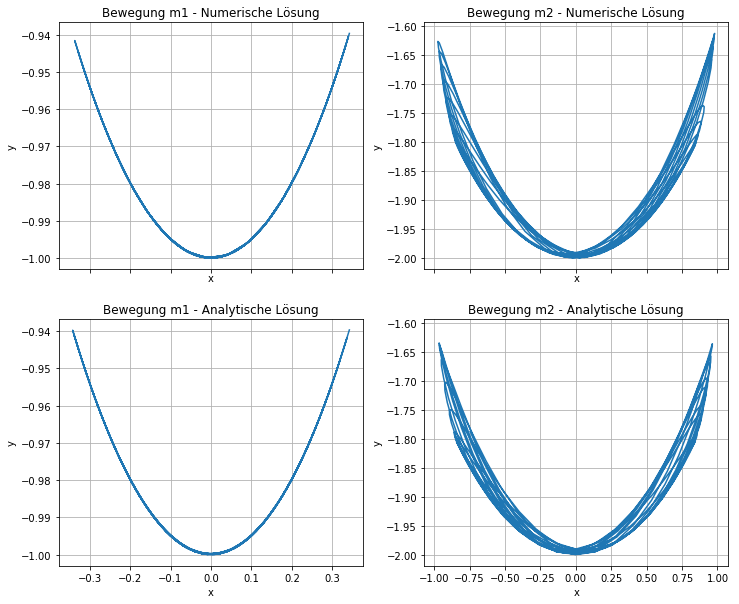

In [25]:
# Wir wollen unsere Bewegung als vier Subplots der selben Figure plotten
# dazu verwenden wir plt.subplots, welches uns ein Tupel zurück liefert
# fig kann man verwenden um einstllungen auf "globaler" Ebene durchzuführen
# ax sind die Achsenobjekte und entsprechen unserern 4 Subplots

# Verwendet man die  Optionen sharex/sharey
# werden in allen plots die gleichen Achsenlimits gesetzt
fig, ax = plt.subplots(2,2, figsize=(12,10),sharex= 'col', sharey= 'col')

# Im folgenden werden für jeden Subplot die Werte und Beschriftungen etc. gesetzt
ax[0,0].plot(nx1, ny1)
ax[0,1].plot(nx2, ny2)
ax[1,0].plot(ax1, ay1)
ax[1,1].plot(ax2, ay2)
ax[0,0].set(xlabel='x', ylabel='y',title='Bewegung m1 - Numerische Lösung')
ax[0,1].set(xlabel='x', ylabel='y',title='Bewegung m2 - Numerische Lösung')
ax[1,0].set(xlabel='x', ylabel='y',title='Bewegung m1 - Analytische Lösung')
ax[1,1].set(xlabel='x', ylabel='y',title='Bewegung m2 - Analytische Lösung')
ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()
ax[1,1].grid()

plt.show()

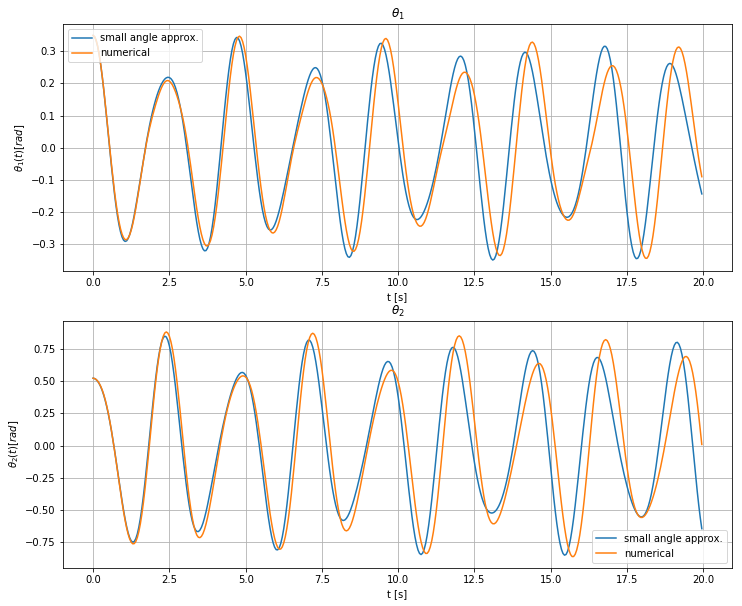

In [21]:
fig, ax = plt.subplots(2, figsize=(12,10))

ax[0].plot(t,ath1, label="small angle approx.")
ax[1].plot(t,ath2, label="small angle approx.")
ax[0].plot(t,n_trj[:, 0], label= "numerical")
ax[1].plot(t,n_trj[:, 2], label= "numerical")
ax[0].set(xlabel='t [s]', ylabel=r"$\theta_1(t) [rad]$",title=r"$\theta_1$")
ax[1].set(xlabel='t [s]', ylabel=r"$\theta_2(t) [rad]$",title=r"$\theta_2$")
for axes in ax:
    axes.legend()
    axes.grid()



plt.show()

## Erstellen einer Animation

Um eine Animation zu erstellen geht man im Grunde vor die auch bei jedem anderen Plot. Allerdings wird nun eine Funktion benötigt die den Plot zu jedem errechneten Zeitpunkt neu erstellt:

In [27]:
fig, ax= plt.subplots(1,2, figsize=(12,5),sharey=True) # Wir Deklarieren unseren Plot mit zwei nebeneinander liegenden Subplots (plt.subplot? für Hilfe)

# Eigenschaften der Subplots definieren:
# ax[0] soll unser chaotisches Pendel ausgeben und ax[1] unser Pendel mit Kleinwinkelnäherung
ax[0].set_xlim((-3,3))
ax[0].set_ylim((-3,3))
ax[0].grid() 
ax[0].set(xlabel='x', ylabel='y',title='Pendelbewegung - Numerische Lösung')

ax[1].set(xlabel='x', ylabel='y',title='Pendelbewegund - Analytische Lösung')
ax[1].set_xlim((-3,3))
ax[1].set_ylim((-3,3))
ax[1].grid() 

line1, = ax[0].plot([], [], 'o-', lw=7) # erzeugt verbindungslinie
line2, = ax[1].plot([], [], 'o-', lw=7) # erzeugt verbindungslinie
time_template = 'time = %.1fs'       # erzeugt string template für zeit ausgabe
time_text = ax[0].text(0.05, 0.9, '', transform=ax[0].transAxes) # setzt position für Zeitangabe subplot ax[0]

def init():  # Initialisieren der Animation mit leerem Frame
    line1.set_data([], [])
    line2.set_data([], [])
    time_text.set_text('')
    return line1, line2, time_text


def animate(i): # Animationsfunktion. Erzeugt Plots zu jedem Zeitpunkt in t
    n_thisx = [0, nx1[i], nx2[i]] # Positionen Numerische Lösung
    n_thisy = [0, ny1[i], ny2[i]]

    a_thisx = [0, ax1[i], ax2[i]] # Positionen Analytische Lösung
    a_thisy = [0, ay1[i], ay2[i]]

    line1.set_data(n_thisx,n_thisy)   # Setzt Verbindunglinien (Pendelleine)
    line2.set_data(a_thisx,a_thisy) 
    time_text.set_text(time_template % (i*dt)) # Erzeugt Zeit-String

    return line1, line2, time_text 

# Erzeugt die Animation:
#animation.FuncAnimation?
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),interval=25, blit=True, init_func=init) 

# Verhindert Ausgabe des Plots (ohne Animation)
plt.close(ani._fig)





### Erstellen eines Videos

Die einzelnen Frames die in der Variable ani gespeichert sind werden nun in ein HTML5-video umgewandelt.
Dies kann eine Weile dauern. Nicht die Gedult verlieren. :)

In [28]:
HTML(ani.to_html5_video())

#  Quellen

https://www.math24.net/double-pendulum/
https://itp.tugraz.at/LV/Analytische_Mechanik/node12.html#SECTION001255000000000000000
https://scipython.com/blog/the-double-pendulum/
https://matplotlib.org/gallery/animation/double_pendulum_sgskip.html
https://de.wikipedia.org/wiki/Doppelpendel
http://tiao.io/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/
https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_demo.html